In [2]:
# Verificaxcion de entorno
import sys, platform
sys.executable, platform.python_version()
import numpy, pandas, sklearn, matplotlib, seaborn, mlflow

print("numpy", numpy.__version__)
print("pandas", pandas.__version__)
print("scikit-learn", sklearn.__version__)
print("mlflow", mlflow.__version__)


numpy 1.26.4
pandas 2.3.3
scikit-learn 1.7.2
mlflow 3.4.0


In [3]:
# === Setup general ===
import os, sys, warnings, json, re
from pathlib import Path
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
np.random.seed(42)

# Visualización y métricas
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, RocCurveDisplay,
                             PrecisionRecallDisplay, classification_report,
                             confusion_matrix)

# MLflow
import mlflow



In [4]:
from dotenv import load_dotenv
#cargar el dataset limpio
load_dotenv() # Cargar variables de entorno desde el archivo .env
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')
os.environ.setdefault("AWS_DEFAULT_REGION", "eu-north-1")
print("AWS_DEFAULT_REGION:", os.environ["AWS_DEFAULT_REGION"])
from pathlib import Path
os.chdir(r"C:\dev\mna-mlops-team46\data")
import subprocess, sys
cmd = ["dvc", "pull", "-v"]  # -v para ver detalles si algo falla
completed = subprocess.run(cmd, capture_output=True, text=True)
print(completed.stdout)
print(completed.stderr)

AWS_DEFAULT_REGION: eu-north-1
2025-10-08 16:48:35,564 DEBUG: v3.63.0 (pip), CPython 3.11.9 on Windows-10-10.0.22631-SP0
2025-10-08 16:48:35,565 DEBUG: command: c:\dev\mna-mlops-team46\.venv\Scripts\dvc pull -v
2025-10-08 16:48:39,810 DEBUG: Preparing to transfer data from 's3://equipo46-dvc/files/md5' to 'C:\dev\mna-mlops-team46\.dvc\cache\files\md5'
2025-10-08 16:48:39,811 DEBUG: Preparing to collect status from 'C:\dev\mna-mlops-team46\.dvc\cache\files\md5'
2025-10-08 16:48:39,811 DEBUG: Collecting status from 'C:\dev\mna-mlops-team46\.dvc\cache\files\md5'
Everything is up to date.
2025-10-08 16:48:39,865 DEBUG: Analytics is enabled.
2025-10-08 16:48:40,062 DEBUG: Trying to spawn ['daemon', 'analytics', 'C:\\Users\\AJIMEN~1\\AppData\\Local\\Temp\\tmp6e0b8xgh', '-v']
2025-10-08 16:48:40,072 DEBUG: Spawned ['daemon', 'analytics', 'C:\\Users\\AJIMEN~1\\AppData\\Local\\Temp\\tmp6e0b8xgh', '-v'] with pid 21572




In [5]:
try:

    # Cargar el dataset clean
    data_clean = pd.read_csv(r"german_credit_modified_cleaned.csv")
    print("Dataset clean cargado exitosamente en df_clean.")

    print("\n--- Información del dataset clean ---")
    print(f"Número de filas: {data_clean.shape[0]}")
    print(f"Número de columnas: {data_clean.shape[1]}")

    print("\n--- Primeras filas del dataset clean ---")
    display(data_clean.head())

except Exception as e:
    print(f"Ocurrió un error: {e}")

Dataset clean cargado exitosamente en df_clean.

--- Información del dataset clean ---
Número de filas: 983
Número de columnas: 21

--- Primeras filas del dataset clean ---


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,1,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,1,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,1,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
import pandas as pd, numpy as np

assert 'data_clean' in globals(), "No encuentro data_clean. Cárgalo antes."
print(data_clean.shape)
data_clean.info()
display(data_clean.head())
print("Nulos por columna:\n", data_clean.isna().sum().sort_values(ascending=False).head(10))



(983, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   983 non-null    int64
 1   duration                 983 non-null    int64
 2   credit_history           983 non-null    int64
 3   purpose                  983 non-null    int64
 4   amount                   983 non-null    int64
 5   savings                  983 non-null    int64
 6   employment_duration      983 non-null    int64
 7   installment_rate         983 non-null    int64
 8   personal_status_sex      983 non-null    int64
 9   other_debtors            983 non-null    int64
 10  present_residence        983 non-null    int64
 11  property                 983 non-null    int64
 12  age                      983 non-null    int64
 13  other_installment_plans  983 non-null    int64
 14  housing                  983 non-null    int64
 

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,1,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,1,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,1,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Nulos por columna:
 status                     0
property                   0
foreign_worker             0
telephone                  0
people_liable              0
job                        0
number_credits             0
housing                    0
other_installment_plans    0
age                        0
dtype: int64


In [7]:
# Definir variable objetivo y variables predictoras
TARGET = "credit_risk"

X = data_clean.drop(columns=[TARGET])
y = data_clean[TARGET]

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Distribución de clases:")
print(y.value_counts(normalize=True).rename("proporción").round(3))


Shape de X: (983, 20)
Shape de y: (983,)
Distribución de clases:
credit_risk
1    0.696
0    0.304
Name: proporción, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Tamaños -> X_train:", X_train.shape, "| X_test:", X_test.shape)
print("Proporción de clase positiva en train:", y_train.mean().round(3))
print("Proporción de clase positiva en test :", y_test.mean().round(3))


Tamaños -> X_train: (786, 20) | X_test: (197, 20)
Proporción de clase positiva en train: 0.696
Proporción de clase positiva en test : 0.695


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

# Pipeline básico con escalado (para modelos lineales)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)


X_train_scaled shape: (786, 20)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             accuracy_score, precision_score, recall_score, f1_score)

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred  = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1  = f1_score(y_test, y_pred, zero_division=0)

print(f"AUC: {auc:.3f} | Acc: {acc:.3f} | Prec: {pre:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, digits=3))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))



AUC: 0.798 | Acc: 0.766 | Prec: 0.870 | Recall: 0.781 | F1: 0.823
Reporte de clasificación:
               precision    recall  f1-score   support

           0      0.595     0.733     0.657        60
           1      0.870     0.781     0.823       137

    accuracy                          0.766       197
   macro avg      0.732     0.757     0.740       197
weighted avg      0.786     0.766     0.772       197

Matriz de confusión:
 [[ 44  16]
 [ 30 107]]


In [11]:
#Función de evaluación

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix)

def eval_model(y_true, y_pred, y_proba=None, nombre="modelo"):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1  = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_proba) if y_proba is not None else np.nan
    print(f"\n[{nombre}] AUC:{auc:.3f} | Acc:{acc:.3f} | Prec:{pre:.3f} | Recall:{rec:.3f} | F1:{f1:.3f}")
    print("Reporte:\n", classification_report(y_true, y_pred, digits=3))
    print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
    return {"roc_auc": auc, "acc": acc, "precision": pre, "recall": rec, "f1": f1}


In [12]:
# Árbol de decisión, Random Forest y Gradient Boosting (baselines)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

resultados = {}

# Árbol de decisión
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)
dt_pred  = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)[:,1]
resultados["DecisionTree"] = eval_model(y_test, dt_pred, dt_proba, "DecisionTree")

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, class_weight="balanced",
    random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred  = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:,1]
resultados["RandomForest"] = eval_model(y_test, rf_pred, rf_proba, "RandomForest")

# Gradient Boosting (no tiene class_weight)
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred  = gb.predict(X_test)
gb_proba = gb.predict_proba(X_test)[:,1]
resultados["GradientBoosting"] = eval_model(y_test, gb_pred, gb_proba, "GradientBoosting")

# Si ya calculaste métricas de Logística antes, añádelas:
# resultados["LogisticRegression"] = {"roc_auc": auc, "acc": acc, "precision": pre, "recall": rec, "f1": f1}

pd.DataFrame(resultados).T.sort_values(["f1","roc_auc"], ascending=False)



[DecisionTree] AUC:0.665 | Acc:0.736 | Prec:0.789 | Recall:0.847 | F1:0.817
Reporte:
               precision    recall  f1-score   support

           0      0.580     0.483     0.527        60
           1      0.789     0.847     0.817       137

    accuracy                          0.736       197
   macro avg      0.685     0.665     0.672       197
weighted avg      0.725     0.736     0.729       197

Matriz de confusión:
 [[ 29  31]
 [ 21 116]]

[RandomForest] AUC:0.827 | Acc:0.782 | Prec:0.794 | Recall:0.927 | F1:0.855
Reporte:
               precision    recall  f1-score   support

           0      0.730     0.450     0.557        60
           1      0.794     0.927     0.855       137

    accuracy                          0.782       197
   macro avg      0.762     0.689     0.706       197
weighted avg      0.774     0.782     0.764       197

Matriz de confusión:
 [[ 27  33]
 [ 10 127]]

[GradientBoosting] AUC:0.786 | Acc:0.777 | Prec:0.816 | Recall:0.876 | F1:0.845
R

,roc_auc,acc,precision,recall,f1
RandomForest,0.826886,0.781726,0.793750,0.927007,0.855219
GradientBoosting,0.786375,0.776650,0.816327,0.875912,0.845070
DecisionTree,0.665024,0.736041,0.789116,0.846715,0.816901


In [13]:
#GridSearchCV para Random Forest (afinar hiperparámetros)

from sklearn.model_selection import StratifiedKFold, GridSearchCV

rf_base = RandomForestClassifier(
    class_weight="balanced", random_state=42, n_jobs=-1
)

param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 8, 12],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 2, 4]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring="f1",      # puedes probar "roc_auc" según tu criterio
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)
print("Mejores hiperparámetros:", gs.best_params_)

rf_best = gs.best_estimator_
best_pred  = rf_best.predict(X_test)
best_proba = rf_best.predict_proba(X_test)[:,1]
res_best = eval_model(y_test, best_pred, best_proba, "RandomForest (opt)")

# Añadir a la tabla comparativa
resultados["RF_opt"] = res_best
pd.DataFrame(resultados).T.sort_values(["f1","roc_auc"], ascending=False)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

[RandomForest (opt)] AUC:0.826 | Acc:0.787 | Prec:0.799 | Recall:0.927 | F1:0.858
Reporte:
               precision    recall  f1-score   support

           0      0.737     0.467     0.571        60
           1      0.799     0.927     0.858       137

    accuracy                          0.787       197
   macro avg      0.768     0.697     0.715       197
weighted avg      0.780     0.787     0.771       197

Matriz de confusión:
 [[ 28  32]
 [ 10 127]]


,roc_auc,acc,precision,recall,f1
RF_opt,0.826277,0.786802,0.798742,0.927007,0.858108
RandomForest,0.826886,0.781726,0.793750,0.927007,0.855219
GradientBoosting,0.786375,0.776650,0.816327,0.875912,0.845070
DecisionTree,0.665024,0.736041,0.789116,0.846715,0.816901


In [14]:
#Ajuste de umbral operativo según costos FN/FP

import numpy as np

proba = rf_best.predict_proba(X_test)[:,1]  # o el modelo que elijas
ths = np.linspace(0.1, 0.9, 33)

def costo_total(y_true, y_prob, thr, costo_fn=5.0, costo_fp=1.0):
    yhat = (y_prob >= thr).astype(int)
    FP = np.sum((y_true==0) & (yhat==1))
    FN = np.sum((y_true==1) & (yhat==0))
    return costo_fn*FN + costo_fp*FP

costes = [(t, costo_total(y_test, proba, t, costo_fn=5.0, costo_fp=1.0)) for t in ths]
thr_opt, costo_min = min(costes, key=lambda x: x[1])
thr_opt, costo_min


(0.325, 51.0)

In [15]:
import mlflow

if mlflow.active_run() is not None:
    rid = mlflow.active_run().info.run_id
    print("Cerrando run activo:", rid)
    mlflow.end_run()
else:
    print("No hay runs activos.")

No hay runs activos.


In [16]:
import mlflow
from mlflow.models import infer_signature
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from pathlib import Path
import mlflow

mlflow.set_tracking_uri(f"file:{Path.cwd() / 'mlruns'}")  # tracking y artefactos locales
mlflow.set_experiment("fase1_modelado_equipo46")
if mlflow.active_run():
    mlflow.end_run()

try:

    with mlflow.start_run(run_name="RF_opt"):
        # 1) Entrenar y predecir
        rf.fit(X_train, y_train)
        y_pred  = rf.predict(X_test)
        y_proba = rf.predict_proba(X_test)[:, 1]

        # 2) Métricas
        rocauc = roc_auc_score(y_test, y_proba)
        f1     = f1_score(y_test, y_pred)

        mlflow.log_metric("roc_auc", float(rocauc))
        mlflow.log_metric("f1", float(f1))
        mlflow.log_params(rf.get_params())

        # 3) Firma e input_example (5 filas de ejemplo)
        X_example = X_test.iloc[:5].copy()
        y_example = rf.predict_proba(X_example)[:, 1]  # salida probabilística
        signature = infer_signature(X_example, y_example)

        # 4) Curva ROC como artefacto
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc_val = auc(fpr, tpr)
        fig = plt.figure()
        plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_val:.3f}")
        plt.plot([0,1], [0,1], linestyle="--")
        plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Curva ROC (RF_opt)"); plt.legend()
        mlflow.log_figure(fig, "roc_curve.png")
        plt.close(fig)

        # 5) Registrar el modelo

        import sklearn, cloudpickle

        pip_reqs = [
            f"scikit-learn=={sklearn.__version__}",
            f"cloudpickle=={cloudpickle.__version__}",
            "numpy",
            "pandas",
            "matplotlib",
            "mlflow",
        ]
        try:
            # MLflow reciente
            mlflow.sklearn.log_model(
                sk_model=rf,
                name="model",                # preferido en versiones nuevas
                input_example=X_example,
                signature=signature,
                pip_requirements=pip_reqs, 
            )
        except TypeError:
            # Compatibilidad hacia atrás (MLflow más viejo)
            mlflow.sklearn.log_model(
                sk_model=rf,
                artifact_path="model",       # parámetro clásico
                input_example=X_example,
                signature=signature,
                pip_requirements=pip_reqs,
            )
finally:
    # Garantiza el cierre del run incluso si hubo excepciones
    if mlflow.active_run():
        mlflow.end_run()

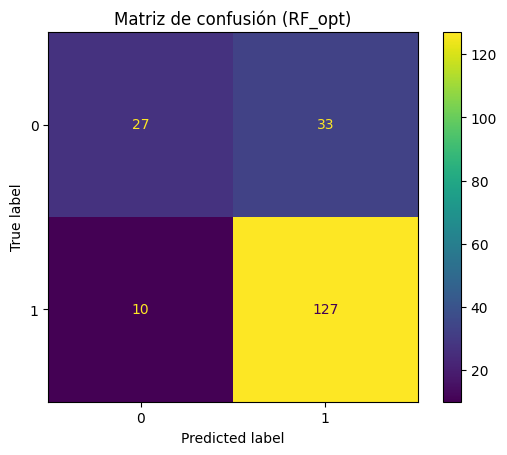

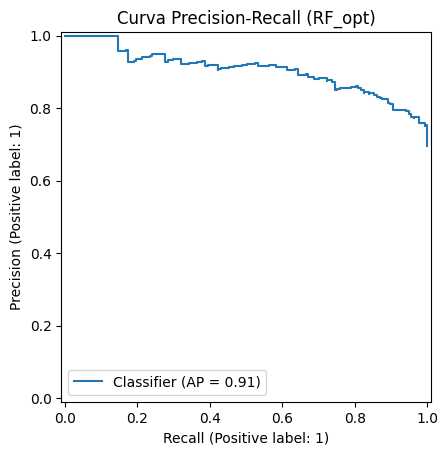

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import numpy as np

# Guardar matriz de confusión / PR curve como artefactos

# Matriz de confusión
fig_cm = plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de confusión (RF_opt)")
mlflow.log_figure(fig_cm, "confusion_matrix.png")
plt.close(fig_cm)

# Curva PR
fig_pr = plt.figure()
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Curva Precision-Recall (RF_opt)")
mlflow.log_figure(fig_pr, "precision_recall_curve.png")
plt.close(fig_pr)

